In [20]:
# import keras
import tensorflow as tf
from tensorflow.python import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.r_[X_train, X_test]
y = np.r_[y_train, y_test]

In [3]:
# one-hot encoding
n_classes = len(np.unique(y))
y = keras.utils.to_categorical(y, n_classes)

In [4]:
n_samples = X.shape[0]
n_features = 784

# reshape
X = X.reshape(n_samples, n_features)

# noramlize
X = X.astype('float32')
X /= 255

In [5]:
print('X shape:',X.shape)
print('y shape:',y.shape)
print('-'*30)
print('X range: [%s, %s]' % (X.min(), X.max()))
print('y range: [%s, %s]' % (y.min(), y.max()))

X shape: (70000, 784)
y shape: (70000, 10)
------------------------------
X range: [0.0, 1.0]
y range: [0.0, 1.0]


In [14]:
# split the datasets into train/valid/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000, 10)


In [15]:
model = Sequential()
model.add(Dense(
    units=512,          # 出力空間の次元数
    activation='relu',  # 活性化関数．softmax, elu, selu, tanh, sigmaido, relu, etc
    input_shape=(784,) # 入力空間の
))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [21]:
optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [23]:
batch_size = 128
epochs = 20

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Train on 44800 samples, validate on 11200 samples
Epoch 1/20
44800/44800 [==============================] - 6s 129us/step - loss: 0.2858 - acc: 0.9151 - val_loss: 0.1355 - val_acc: 0.9601
Epoch 2/20
44800/44800 [==============================] - 2s 46us/step - loss: 0.1177 - acc: 0.9633 - val_loss: 0.0981 - val_acc: 0.9695
Epoch 3/20
44800/44800 [==============================] - 2s 46us/step - loss: 0.0785 - acc: 0.9751 - val_loss: 0.0811 - val_acc: 0.9745
Epoch 4/20
44800/44800 [==============================] - 2s 47us/step - loss: 0.0600 - acc: 0.9807 - val_loss: 0.0831 - val_acc: 0.9754
Epoch 5/20
44800/44800 [==============================] - 2s 49us/step - loss: 0.0467 - acc: 0.9848 - val_loss: 0.0754 - val_acc: 0.9798
Epoch 6/20
44800/44800 [==============================] - 2s 48us/step - loss: 0.0384 - acc: 0.9872 - val_loss: 0.0749 - val_acc: 0.9783
Epoch 7/20
44800/44800 [==============================] - 2s 48us/step - loss: 0.0358 - acc: 0.9878 - val_loss: 0.0784 - val_ac

In [24]:
score = model.evaluate(X_test, y_test, verbose=1)

14000/14000 [==============================] - 1s 65us/step


In [26]:
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)

Test loss: 0.09438472342251979
Test accuracy: 97.99285714285715


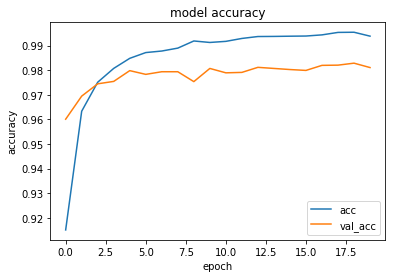

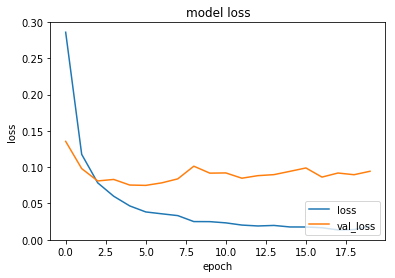

In [27]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)